# Experiments on random data

## Contents

- [1. Preliminary](#1-preliminary)
    - [1.1 Imports](#1-1-imports)
    - [1.2 Set up algorithms](#1-2-set-up)
- [2. Convergence without constraints](#2-no-constraints)
    - [2.1 Tucker+(Lr, 1)](#2-1-tld)
        - [2.1.1 Computations](#2-1-1-computations)
        - [2.1.2 Underestimated and precise ranks](#2-1-2-all-ranks)
        - [2.1.3 Precise rank plot](#2-1-3-as-published)
    - [2.2 Full (lr, 1)](#2-2-lro)
        - [2.2.1 Computations](#2-2-1-computations)
        - [2.2.2 Underestimated and precise ranks](#2-2-2-all-ranks)
        - [2.2.3 Precise rank plot](#2-2-3-as-published)
- [3. Convergence with group constraints (projected iterations)](#3-projected)
    - [3.1 Tucker+(Lr, 1)](#3-1-tld)
        - [3.1.1 Computations](#3-1-1-computations)
        - [3.1.2 Underestimated and precise ranks](#3-1-2-all-ranks)
        - [3.1.3 Precise rank plot](#3-1-3-as-published)
    - [3.2 Full (lr, 1)](#3-2-lro)
        - [3.2.1 Computations](#3-2-1-computations)
        - [3.2.2 Underestimated and precise ranks](#3-2-2-all-ranks)
        - [3.2.3 Precise rank plot](#3-2-3-as-published)
- [4. Convergence with group constraints (Lagrange multipliers)](#4-lm)
    - [4.1 Tucker+(Lr, 1)](#4-1-tld)
        - [4.1.1 Computations](#4-1-1-computations)
        - [4.1.2 Underestimated and precise ranks](#4-1-2-all-ranks)
        - [4.1.3 Precise rank plot](#4-1-3-as-published)
    - [4.2 Full (lr, 1)](#4-2-lro)
        - [4.2.1 Computations](#4-2-1-computations)
        - [4.2.2 Underestimated and precise ranks](#4-2-2-all-ranks)
        - [4.2.3 Precise rank plot](#4-2-3-as-published)


## 1. Preliminary <a class="anchor" id="1-preliminary"></a>

- [1.1 Imports](#1-1-imports)
- [1.2 Set up algorithms](#1-2-set-up)

[Back to contents](#Contents)

### 1.1 Imports <a class="anchor" id="1-preliminary"></a>

[Up to section](#1-preliminary) $\quad$
[Back to contents](#Contents)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import copy
import os
import sys
sys.path.append('../src/')
import gtcd
import random_experiment_tcd as random_experiment
import group_tcd

random_state = 235

### 1.2 Set up algorithms <a class="anchor" id="1-2-set-up"></a>

[Up to section](#1-preliminary) $\quad$
[Back to contents](#Contents)

In [2]:
results_dirname = '../results/experiment1/'

try:
    os.makedirs('../results/experiment1')
except:
    print('Directory for results exists')

Nrun = 50
N_jobs = 2
maxitnum = 50
maxInnerIt = 15
tolRes = 1e-8
tolGrad = 1e-8
tolSwamp = 1e-8
verbose = 0
random_state = 235

def projector(canonical_dict=None, lro_dict=None, tucker_dict=None):
    rv = group.projector_group_constraint(
        canonical_dict, lro_dict, tucker_dict, dimnums=constraints['dimnum'], vect=False
    )
    return rv

# set up different algorithms
def alsM(a, x0, cdN, ldN, tdN, maxitnum, constraints):
    return gtcd.tcd(
        a, x0=x0, canonical_dict=cdN, lro_dict=ldN, tucker_dict=tdN, maxitnum=maxitnum, 
        tolRes=tolRes, tolGrad=tolGrad, tolSwamp=tolSwamp, method='als', verbose=verbose, 
        regTGD=None, regPGD=None, doSA=0, constraints=constraints
    )
def gdM(a, x0, cdN, ldN, tdN, maxitnum, constraints):
    return gtcd.tcd(
        a, x0=x0, canonical_dict=cdN, lro_dict=ldN, tucker_dict=tdN, maxitnum=maxitnum, 
        tolRes=tolRes, tolGrad=tolGrad,tolSwamp=tolSwamp, method='gd', backtrack=True, 
        verbose=verbose, regTGD=None, regPGD=None, doSA=0, constraints=constraints
    )
def gdrtM(a, x0, cdN, ldN, tdN, maxitnum, constraints):
    return gtcd.tcd(
        a, x0=x0, canonical_dict=cdN, lro_dict=ldN, tucker_dict=tdN, maxitnum=maxitnum, 
        tolRes=tolRes, tolGrad=tolGrad, tolSwamp=tolSwamp, method='gd', backtrack=True,
        verbose=verbose, regTGD=1e-3, regPGD=None, doSA=0, constraints=constraints
    )
def gdrpM(a, x0, cdN, ldN, tdN, maxitnum, constraints):
    return gtcd.tcd(
        a, x0=x0, canonical_dict=cdN, lro_dict=ldN, tucker_dict=tdN, maxitnum=maxitnum, 
        tolRes=tolRes, tolGrad=tolGrad, tolSwamp=tolSwamp, method='gd', backtrack=True, 
        verbose=verbose, regTGD=None, regPGD=1e-3, doSA=0, constraints=constraints
    )
def cgfrM(a, x0, cdN, ldN, tdN, maxitnum, constraints):
    return gtcd.tcd(
        a, x0=x0, canonical_dict=cdN, lro_dict=ldN, tucker_dict=tdN, maxitnum=maxitnum,
        tolRes=tolRes, tolGrad=tolGrad, tolSwamp=tolSwamp, method='cg', betaCG='fr', 
        verbose=verbose, regTGD=None, regPGD=None, doSA=0, constraints=constraints
    )
def cgprM(a, x0, cdN, ldN, tdN, maxitnum, constraints):
    return gtcd.tcd(
        a, x0=x0, canonical_dict=cdN, lro_dict=ldN, tucker_dict=tdN, maxitnum=maxitnum, 
        tolRes=tolRes, tolGrad=tolGrad, tolSwamp=tolSwamp, method='cg', betaCG='pr', 
        verbose=verbose, regTGD=None, regPGD=None, doSA=0, constraints=constraints
    )
def cghsM(a, x0, cdN, ldN, tdN, maxitnum, constraints):
    return gtcd.tcd(
        a, x0=x0, canonical_dict=cdN, lro_dict=ldN, tucker_dict=tdN, maxitnum=maxitnum,
        tolRes=tolRes, tolGrad=tolGrad, tolSwamp=tolSwamp, method='cg', betaCG='hs',
        verbose=verbose, regTGD=None, regPGD=None, doSA=0, constraints=constraints
    )

def cgdyM(a, x0, cdN, ldN, tdN, maxitnum, constraints):
    return gtcd.tcd(
        a, x0=x0, canonical_dict=cdN, lro_dict=ldN, tucker_dict=tdN, maxitnum=maxitnum, 
        tolRes=tolRes, tolGrad=tolGrad, tolSwamp=tolSwamp, method='cg', betaCG='dy', 
        verbose=verbose, regTGD=None, regPGD=None, doSA=0, constraints=constraints
    )
def gnM(a, x0, cdN, ldN, tdN, maxitnum, constraints):
    return gtcd.tcd(
        a, x0=x0, canonical_dict=cdN, lro_dict=ldN, tucker_dict=tdN, maxitnum=maxitnum, 
        tolRes=tolRes,tolGrad=tolGrad,tolSwamp=tolSwamp, method='gn', backtrack=True, 
        verbose=verbose, regTGD=None, regPGD=None, doSA=0, constraints=constraints
    )
def lmqM(a, x0, cdN, ldN, tdN, maxitnum, constraints):
    return gtcd.tcd(
        a, x0=x0, canonical_dict=cdN, lro_dict=ldN, tucker_dict=tdN, maxitnum=maxitnum, 
        tolRes=tolRes, tolGrad=tolGrad, tolSwamp=tolSwamp, method='lm', epsilonLM=1e-8,
        lmSetup='Quadratic', muInit=1., verbose=verbose, regTGD=None, regPGD=None,
        doSA=0, constraints=constraints
    )
def lmnM(a, x0, cdN, ldN, tdN, maxitnum, constraints):
    return gtcd.tcd(
        a, x0=x0, canonical_dict=cdN, lro_dict=ldN, tucker_dict=tdN, maxitnum=maxitnum, 
        tolRes=tolRes, tolGrad=tolGrad, tolSwamp=tolSwamp, method='lm', epsilonLM=1e-8,
        lmSetup='Nielsen', muInit=1., verbose=verbose, regTGD=None, regPGD=None,
        doSA=0, constraints=constraints
    )
def doglegM(a, x0, cdN, ldN, tdN, maxitnum, constraints):
    return gtcd.tcd(
        a, x0=x0, canonical_dict=cdN, lro_dict=ldN, tucker_dict=tdN, maxitnum=maxitnum, 
        maxInnerIt=maxInnerIt, tolRes=tolRes, tolGrad=tolGrad, tolSwamp=tolSwamp, method='tr', 
        verbose=verbose, doSA=0, constraints=constraints, trStep='dogleg',
        trDelta0=1.2,trEta=0.23
    )
def scg_qnM(a, x0, cdN, ldN, tdN, maxitnum, constraints):
    return gtcd.tcd(
        a, x0=x0, canonical_dict=cdN, lro_dict=ldN, tucker_dict=tdN, maxitnum=maxitnum, 
        maxInnerIt=maxInnerIt, tolRes=tolRes, tolGrad=tolGrad, tolSwamp=tolSwamp, method='tr', 
        verbose=verbose, doSA=0, constraints=constraints, curvature=0, trStep='scg',
        trDelta0=1.2, trEta=0.23
    )
def scg_fnM(a, x0, cdN, ldN, tdN, maxitnum, constraints):
    return gtcd.tcd(
        a, x0=x0, canonical_dict=cdN, lro_dict=ldN, tucker_dict=tdN, maxitnum=maxitnum, 
        maxInnerIt=maxInnerIt, tolRes=tolRes, tolGrad=tolGrad, tolSwamp=tolSwamp, method='tr', 
        verbose=verbose, doSA=0, constraints=constraints, curvature=1, trStep='scg',
        trDelta0=1.2, trEta=0.23
    )

# https://stackoverflow.com/questions/23862406/
def select_methods(methods, selectedMethodNamesList):
    availableNames = [value[0] for key, value in methods.iteritems()]
    availableNames = set(availableNames)
    assert len(availableNames.intersection(set(selectedMethodNamesList))) == len(selectedMethodNamesList)
    use_methods = {key: value for key, value in methods.iteritems() if value[0] in selectedMethodNamesList}
    use_methods = {i: value for i, (key, value) in enumerate(use_methods.iteritems())}
    return use_methods

methods_names = [
    "ALS", "GD", "CG-FR", "CG-PR", "CG-HS", "CG-DY", "GN", "LM-Q", "LM-N", "TR-DL", "SCG-QN", "SCG-FN"
]
algs = [alsM, gdM, cgfrM, cgprM, cghsM, cgdyM, gnM, lmqM, lmnM, doglegM, scg_qnM, scg_fnM]

methods = {}
for i in range(len(algs)):
    methods[i] = [methods_names[i], algs[i]]
    
    


Directory for results exists


## 2. Convergence without constraints <a class="anchor" id="2-no-constraints"></a>

- [2.1 Tucker+(Lr, 1)](#2-1-tld)
    - [2.1.1 Computations](#2-1-1-computations)
    - [2.1.2 Underestimated and precise ranks](#2-1-2-all-ranks)
    - [2.1.3 Precise rank plot](#2-1-3-as-published)
- [2.2 Full (lr, 1)](#2-2-lro)
    - [2.2.1 Computations](#2-2-1-computations)
    - [2.2.2 Underestimated and precise ranks](#2-2-2-all-ranks)
    - [2.2.3 Precise rank plot](#2-2-3-as-published)

[Back to contents](#Contents)

## 2.1 Tucker+(Lr, 1) <a class="anchor" id="2-1-tld"></a>

- [2.1.1 Computations](#2-1-1-computations)
- [2.1.2 Underestimated and precise ranks](#2-1-2-all-ranks)
- [2.1.3 Precise rank plot](#2-1-3-as-published)

[Up to section](#2-no-constraints) $\quad$
[Back to contents](#Contents)

### 2.1.1 Computations <a class="anchor" id="2-1-1-computations"></a>

[Up to subsection](#2-1-tld) $\quad$
[Up to section](#2-no-constraints) $\quad$
[Back to contents](#Contents)

In [3]:
np.random.seed(random_state)
result_filename = 'TLD_no-constraints.npz'
result_dirname = '../results/experiment1/'

use_method_names = []
if len(use_method_names) > 0:
    use_methods = select_methods(methods, use_method_names)
else:
    use_methods = copy.deepcopy(methods)

constraints = None
#################### Tensor configuration #####################
# dimensionality
d = 3
# shape
n = [20]*d
################# Tucker terms
# number of Tucker terms
NTcores = 1
# Tucker ranks
r = 3*np.ones([NTcores, d], dtype=np.int)
################# (Lr, 1) terms
# number of (Lr, 1) terms
Rl = 5
#configuration of (Lr, 1) terms
fset = 3
#L = range(fset, Rl+fset)
L = [fset]*Rl
P = d-1
###############################################################
# gather parameters into dictionaries
lro_dict = {
    'L': L,
    'P': P
}
tucker_dict = {
    'r': r
}
canonical_dict = None


random_experiment.launcher(
    N_jobs, result_dirname, n, use_methods, canonical_dict, lro_dict, tucker_dict,
    result_filename, Nrun, maxitnum
)
print("Tucker+(Lr,1): convergence without constraints, finished")

process 1 with 25 starts
process 2 with 25 starts
1: Run: 1	 Alg: ALS	 Clock: 1.03e+00	Time: 1.03e+00	 Fv: 5.681e-02	Gv: nan; Ranks [1 1]
2: Run: 1	 Alg: ALS	 Clock: 1.03e+00	Time: 1.03e+00	 Fv: 3.056e-02	Gv: nan; Ranks [1 1]
1: Run: 1	 Alg: GD	 Clock: 1.11e+00	Time: 1.11e+00	 Fv: 1.760e-01	Gv: 4.863e-02; Ranks [1 1]
2: Run: 1	 Alg: GD	 Clock: 1.12e+00	Time: 1.12e+00	 Fv: 6.275e-02	Gv: 1.015e-01; Ranks [1 1]
2: Run: 1	 Alg: CG-FR	 Clock: 2.93e-01	Time: 2.94e-01	 Fv: 1.891e-01	Gv: 3.540e-01; Ranks [1 1]
1: Run: 1	 Alg: CG-FR	 Clock: 8.39e-01	Time: 8.40e-01	 Fv: 2.821e-01	Gv: 1.945e-01; Ranks [1 1]
1: Run: 1	 Alg: CG-PR	 Clock: 1.20e+00	Time: 1.20e+00	 Fv: 1.539e-01	Gv: 8.309e-02; Ranks [1 1]
2: Run: 1	 Alg: CG-PR	 Clock: 1.21e+00	Time: 1.21e+00	 Fv: 4.160e-02	Gv: 3.237e-02; Ranks [1 1]
1: Run: 1	 Alg: CG-HS	 Clock: 1.12e+00	Time: 1.12e+00	 Fv: 1.046e-01	Gv: 1.223e-02; Ranks [1 1]
2: Run: 1	 Alg: CG-HS	 Clock: 1.13e+00	Time: 1.13e+00	 Fv: 4.371e-02	Gv: 2.554e-01; Ranks [1 1]
2: Run: 1	 A

/home/hariyuki/apd/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/hariyuki/work/gbtd/src/gtcd.py:2858: RuntimeWarning: overflow encountered in multiply
  hdd = np.sum(Hkdj * dj)
/home/hariyuki/apd/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/hariyuki/work/gbtd/src/gtcd.py:2865: RuntimeWarning: overflow encountered in multiply
  tauj = - np.sum((Hk(zj) + gk)*dj) / np.sum(Hkdj*dj)
/home/hariyuki/apd/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/hariyuki/work/gbtd/src/gtcd.py:2858: RuntimeWarning: overflow encountered in multiply
  hdd = np.sum(Hkdj * dj)
/home/hariyuki/apd/lib/python3.7/site-packages/numpy/core/fromnu

1: Run: 1	 Alg: SCG-FN	 Clock: 8.55e+01	Time: 8.57e+01	 Fv: nan	Gv: nan; Ranks [1 1]
1: Run: 1	 Alg: ALS	 Clock: 1.07e+00	Time: 1.07e+00	 Fv: 5.051e-02	Gv: nan; Ranks [2 1]
1: Run: 1	 Alg: GD	 Clock: 1.38e+00	Time: 1.38e+00	 Fv: 1.087e-01	Gv: 3.593e-02; Ranks [2 1]
1: Run: 1	 Alg: CG-FR	 Clock: 1.01e+00	Time: 1.01e+00	 Fv: 2.821e-01	Gv: 1.953e-01; Ranks [2 1]
1: Run: 1	 Alg: CG-PR	 Clock: 1.37e+00	Time: 1.37e+00	 Fv: 1.011e-01	Gv: 4.158e-02; Ranks [2 1]
1: Run: 1	 Alg: CG-HS	 Clock: 1.41e+00	Time: 1.41e+00	 Fv: 1.055e-01	Gv: 3.699e-02; Ranks [2 1]
1: Run: 1	 Alg: CG-DY	 Clock: 7.86e-01	Time: 7.87e-01	 Fv: 1.772e-01	Gv: 3.141e-01; Ranks [2 1]
2: Run: 1	 Alg: SCG-FN	 Clock: 9.94e+01	Time: 9.96e+01	 Fv: nan	Gv: nan; Ranks [1 1]
2: Run: 1	 Alg: ALS	 Clock: 1.01e+00	Time: 1.01e+00	 Fv: 2.515e-02	Gv: nan; Ranks [2 1]
2: Run: 1	 Alg: GD	 Clock: 1.33e+00	Time: 1.34e+00	 Fv: 5.413e-02	Gv: 5.013e-02; Ranks [2 1]
2: Run: 1	 Alg: CG-FR	 Clock: 5.80e-01	Time: 5.80e-01	 Fv: 2.429e-01	Gv: 3.939e-01; 

Process Process-2:
Process Process-1:
Traceback (most recent call last):
  File "/home/hariyuki/apd/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/hariyuki/apd/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/hariyuki/work/gbtd/src/random_experiment_tcd.py", line 207, in ex1_Convergence
    cdN, ldN, tdN, info = alg(a, x0, cdN, ldN, tdN, maxitnum, constraints)
  File "<ipython-input-2-51fc6bbf8ed5>", line 106, in scg_qnM
    trDelta0=1.2, trEta=0.23
  File "/home/hariyuki/apd/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/hariyuki/work/gbtd/src/gtcd.py", line 4473, in tcd
    fmkxnew = fmk(xnew)
  File "/home/hariyuki/apd/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/hariyuki/work/gbtd/src/gtcd.py", line 4272, in <

KeyboardInterrupt: 

### 2.1.2 Underestimated and precise ranks <a class="anchor" id="2-1-2-all-ranks"></a>

[Up to subsection](#2-1-tld) $\quad$
[Up to section](#2-no-constraints) $\quad$
[Back to contents](#Contents)

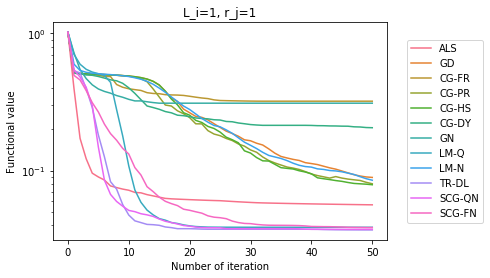

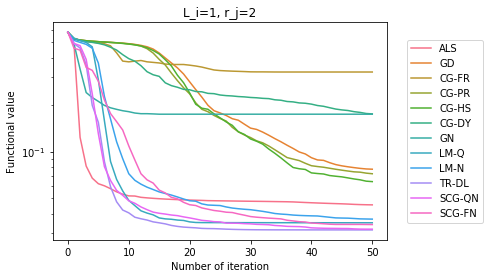

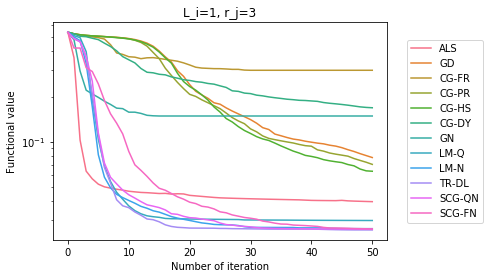

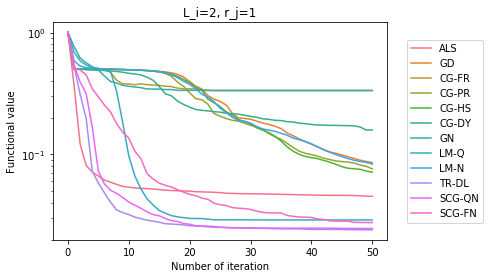

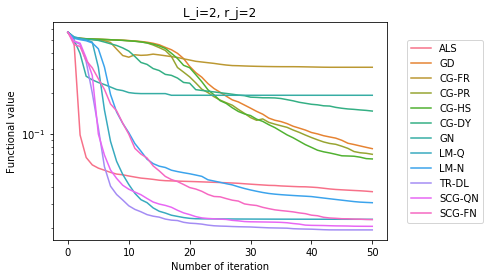

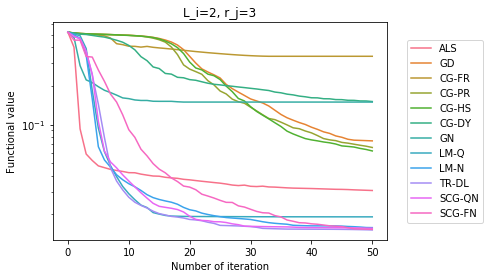

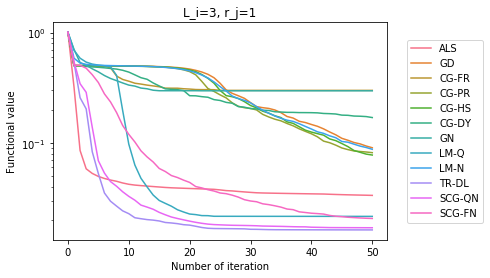

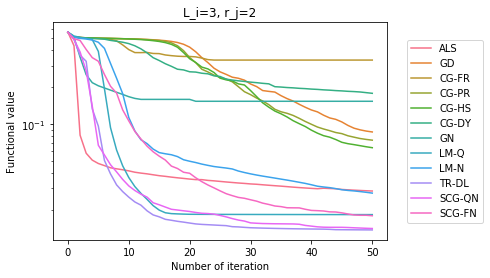

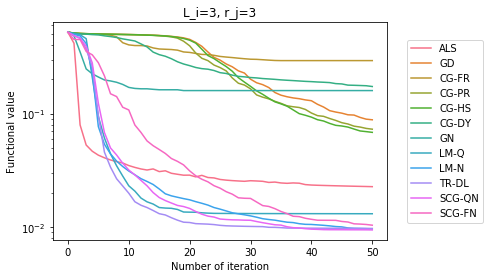

In [3]:
result_dirname = '../results/experiment1/'
result_filename = 'TLD_no-constraints.npz'

use_method_names = []
if len(use_method_names) > 0:
    use_methods = select_methods(methods, use_method_names)
else:
    use_methods = copy.deepcopy(methods)

df = np.load(result_dirname+result_filename)
palette = sns.color_palette("husl", len(use_methods))
f = df['resultFV']
I, J = f.shape[2:4]
for i in xrange(I):
    for j in xrange(J):
        for k in xrange(len(use_methods)):
            plt.semilogy(np.median(f[:, k, i, j, :], axis=0), label=use_methods[k][0], color=palette[k])
        plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
        plt.title('L_i=%d, r_j=%d' % (i+1, j+1))
        plt.xlabel('Number of iteration')
        plt.ylabel('Functional value')
        plt.show()

## 2.1.3 Precise rank plot <a class="anchor" id="2-1-3-as-published"></a>

[Up to subsection](#2-1-tld) $\quad$
[Up to section](#2-no-constraints) $\quad$
[Back to contents](#Contents)

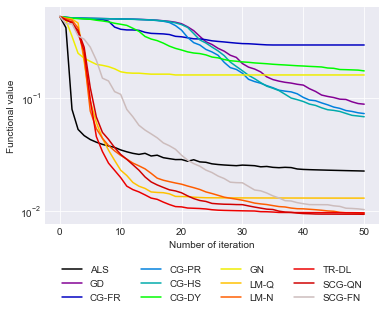

In [4]:
result_dirname = '../results/experiment1/'
result_filename = 'TLD_no-constraints.npz'

use_method_names = []
if len(use_method_names) > 0:
    use_methods = select_methods(methods, use_method_names)
else:
    use_methods = copy.deepcopy(methods)

df = np.load(result_dirname+result_filename)
#palette = sns.color_palette("husl", len(use_methods))
current_cmap = plt.get_cmap('nipy_spectral')
cmap_alpha = 0.
cmap_beta = 0.35
cmap_gamma = 0.7
cmap_delta = 0.995
w = 0.3
cmap_interval = np.linspace(cmap_alpha, cmap_beta, len(use_methods)/2-1).tolist()
cmap_interval += [w*cmap_beta + (1.-w)*cmap_gamma]
cmap_interval += np.linspace(cmap_gamma, cmap_delta, len(use_methods)-len(use_methods)/2).tolist()
palette = [current_cmap(x) for x in cmap_interval]
sns.set_style("darkgrid")
fig = plt.figure(figsize=(6, 4))
f = df['resultFV']
I, J = f.shape[2:4]
for k in xrange(len(use_methods)):
    plt.semilogy(np.median(f[:, k, -1, -1, :], axis=0), label=use_methods[k][0], color=palette[k])


plt.xlabel('Number of iteration')
plt.ylabel('Functional value')
suffix = '_en'


legend = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.show()

### 2.2 Full (Lr, 1) <a class="anchor" id="2-2-lro"></a>

- [2.2.1 Computations](#2-2-1-computations)
- [2.2.2 Underestimated and precise ranks](#2-2-2-all-ranks)
- [2.2.3 Precise rank plot](#2-2-3-as-published)

[Up to section](#2-no-constraints) $\quad$
[Back to contents](#Contents)

### 2.2.1 Computations <a class="anchor" id="2-2-1-computations"></a>

[Up to subsection](#2-2-lro) $\quad$
[Up to section](#2-no-constraints) $\quad$
[Back to contents](#Contents)

In [ ]:
np.random.seed(random_state)

result_dirname = '../results/experiment1/'
result_filename = 'LRO_no-constraints.npz'

constraints = None

use_method_names = []
if len(use_method_names) > 0:
    use_methods = select_methods(methods, use_method_names)
else:
    use_methods = copy.deepcopy(methods)

#################### Tensor configuration #####################
# dimensionality
d = 3
# shape
n = [20]*d
################## (Lr, 1) terms config
# number of (Lr, 1) terms
Rl = 5
#configuration of (Lr, 1) terms
fset = 3
#L = range(fset, Rl+fset)
L = [fset]*Rl
P = d-1
###############################################################
# gather parameters into dictionaries
lro_dict = {
    'L': L,
    'P': P
}
tucker_dict = None
canonical_dict = None

random_experiment.launcher(
    N_jobs, result_dirname, n, use_methods, canonical_dict, lro_dict, tucker_dict,
    result_filename, Nrun, maxitnum
)
print "Full (Lr,1): convergence without constraints"

### 2.2.2 Underestimated and precise ranks <a class="anchor" id="2-2-2-all-ranks"></a>

[Up to subsection](#2-2-lro) $\quad$
[Up to section](#2-no-constraints) $\quad$
[Back to contents](#Contents)

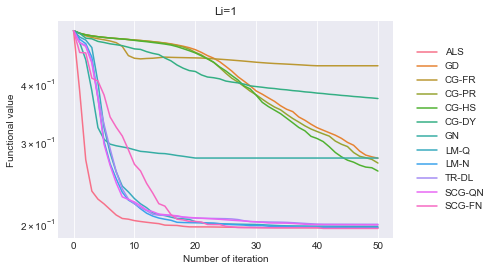

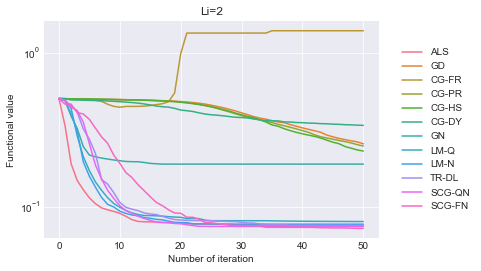

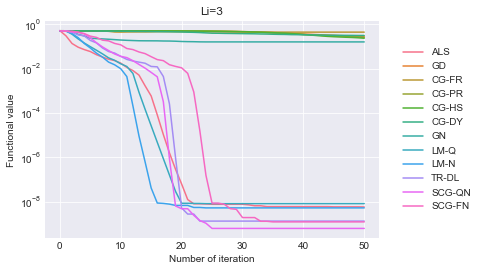

In [5]:
result_dirname = '../results/experiment1/'
result_filename = 'LRO_no-constraints.npz'

df = np.load(result_dirname+result_filename)
palette = sns.color_palette("husl", len(use_methods))
f = df['resultFV']
I = f.shape[2]
for i in xrange(I):
    for k in xrange(len(use_methods)):
        plt.semilogy(np.median(f[:, k, i, :], axis=0), label=use_methods[k][0], color=palette[k])
    plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
    plt.title('Li=%d' % (i+1))
    plt.xlabel('Number of iteration')
    plt.ylabel('Functional value')    
    plt.show()

### 2.2.3 Precise rank plot <a class="anchor" id="2-2-3-as-published"></a>

[Up to subsection](#2-2-lro) $\quad$
[Up to section](#2-no-constraints) $\quad$
[Back to contents](#Contents)

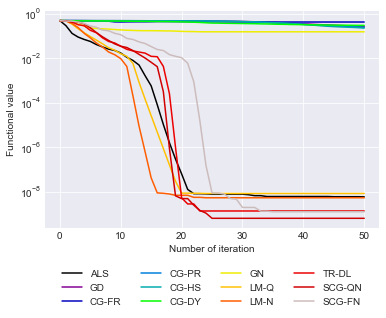

In [6]:
result_dirname = '../results/experiment1/'
result_filename = 'LRO_no-constraints.npz'

use_method_names = []
if len(use_method_names) > 0:
    use_methods = select_methods(methods, use_method_names)
else:
    use_methods = copy.deepcopy(methods)

df = np.load(result_dirname+result_filename)

current_cmap = plt.get_cmap('nipy_spectral')
cmap_alpha = 0.
cmap_beta = 0.35
cmap_gamma = 0.7
cmap_delta = 0.995
w = 0.3
cmap_interval = np.linspace(cmap_alpha, cmap_beta, len(use_methods)/2-1).tolist()
cmap_interval += [w*cmap_beta + (1.-w)*cmap_gamma]
cmap_interval += np.linspace(cmap_gamma, cmap_delta, len(use_methods)-len(use_methods)/2).tolist()
palette = [current_cmap(x) for x in cmap_interval]
sns.set_style("darkgrid")
fig = plt.figure(figsize=(6, 4))
f = df['resultFV']

I, J = f.shape[2:4]

for k in xrange(len(use_methods)):
    plt.semilogy(np.median(f[:, k, -1, :], axis=0), label=use_methods[k][0], color=palette[k])

plt.xlabel('Number of iteration')
plt.ylabel('Functional value')


legend = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.show()

## 3. Convergence with group constraints (projected iterations) <a class="anchor" id="3-projected"></a>

- [3.1 Tucker+(Lr, 1)](#3-1-tld)
    - [3.1.1 Computations](#3-1-1-computations)
    - [3.1.2 Underestimated and precise ranks](#3-1-2-all-ranks)
    - [3.1.3 Precise rank plot](#3-1-3-as-published)
- [3.2 Full (lr, 1)](#3-2-lro)
    - [3.2.1 Computations](#3-2-1-computations)
    - [3.2.2 Underestimated and precise ranks](#3-2-2-all-ranks)
    - [3.2.3 Precise rank plot](#3-2-3-as-published)

[Back to contents](#Contents)

## 3.1 Tucker+(Lr, 1) <a class="anchor" id="3-1-tld"></a>

- [3.1.1 Computations](#3-1-1-computations)
- [3.1.2 Underestimated and precise ranks](#3-1-2-all-ranks)
- [3.1.3 Precise rank plot](#3-1-3-as-published)

[Up to section](#3-projected) $\quad$
[Back to contents](#Contents)

### 3.1.1 Computations <a class="anchor" id="3-1-1-computations"></a>

[Up to subsection](#3-1-tld) $\quad$
[Up to section](#3-projected) $\quad$
[Back to contents](#Contents)

In [ ]:
np.random.seed(random_state)
constrained_modes = [0]
result_dirname = '../results/experiment1/'
result_filename = 'TLD_projected.npz'

try:
    os.mkdir(result_dirname)
except:
    print '%s already exists' % (result_dirname)

use_method_names = []
if len(use_method_names) > 0:
    use_methods = select_methods(methods, use_method_names)
else:
    use_methods = copy.deepcopy(methods)

#################### Tensor configuration ################
# Number of subjects
Nsubj = 5
# Single Tucker term for group part
NTcores = 1
# dimensionality
d = 3
# shape
n = [20]*(d-1)+[Nsubj]
################## Tucker term parameters
# rank
r = 3*np.ones([NTcores, d], dtype=np.int)
r[:, -1] = Nsubj
################## (Lr, 1) terms parameters
Rl = Nsubj
L = [3]*Rl
P = d-1
##########################################################
canonical_dict = None
lro_dict = {
    'L': L,
    'P': P
}
tucker_dict = {
    'r': r
}

constraints = group.group_constraint(n, constrained_modes, otype='projected')

random_experiment.launcher(
    N_jobs, result_dirname, n, use_methods, canonical_dict, lro_dict, tucker_dict,
    result_filename, Nrun, maxitnum, constraints, projector
)
print "Tucker+(Lr,1): convergence with proj group constraint"


### 3.1.2 Underestimated and precise ranks <a class="anchor" id="3-1-2-all-ranks"></a>

[Up to subsection](#3-1-tld) $\quad$
[Up to section](#3-projected) $\quad$
[Back to contents](#Contents)

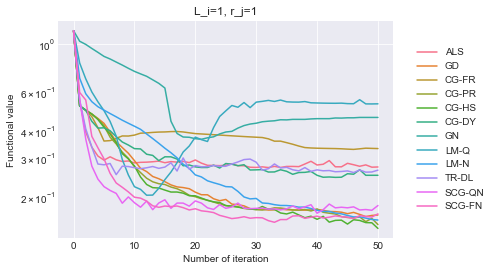

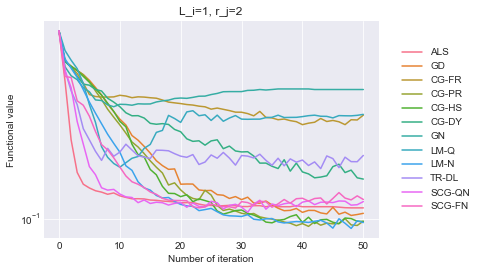

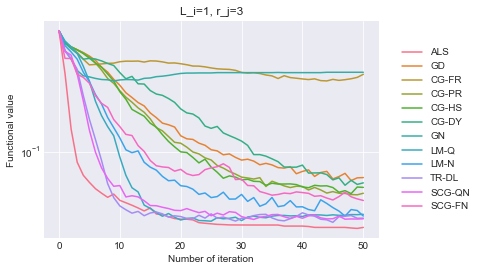

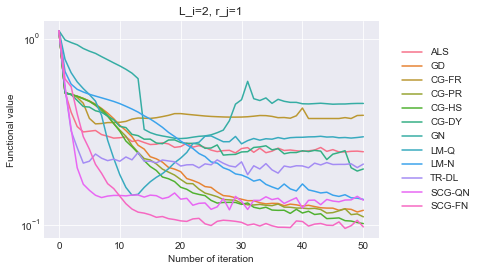

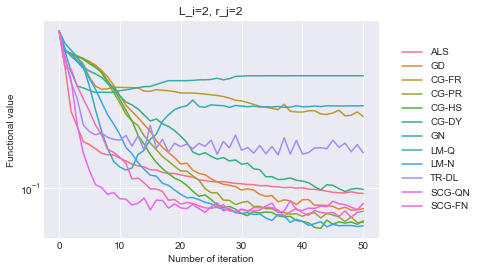

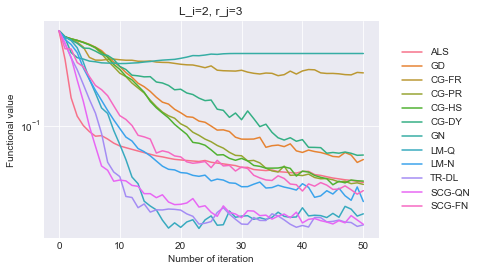

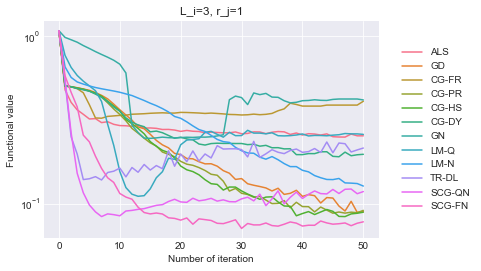

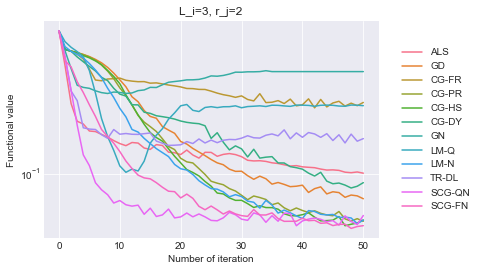

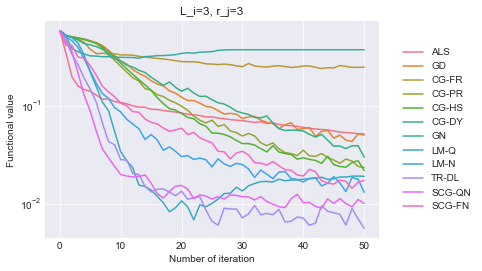

In [7]:
result_dirname = '../results/experiment1/'
result_filename = 'TLD_projected.npz'
use_method_names = []
if len(use_method_names) > 0:
    use_methods = select_methods(methods, use_method_names)
else:
    use_methods = copy.deepcopy(methods)
df = np.load(result_dirname+result_filename)
palette = sns.color_palette("husl", len(use_methods))
f = df['resultFV']
I, J = f.shape[2:4]
for i in xrange(I):
    for j in xrange(J):
        for k in xrange(len(use_methods)):
            plt.semilogy(np.median(f[:, k, i, j, :], axis=0), label=use_methods[k][0], color=palette[k])
        plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
        plt.title('L_i=%d, r_j=%d' % (i+1, j+1))
        plt.xlabel('Number of iteration')
        plt.ylabel('Functional value')
        plt.show()

### 3.1.3 Precise rank plot <a class="anchor" id="3-1-3-as-published"></a>

[Up to subsection](#3-1-tld) $\quad$
[Up to section](#3-projected) $\quad$
[Back to contents](#Contents)

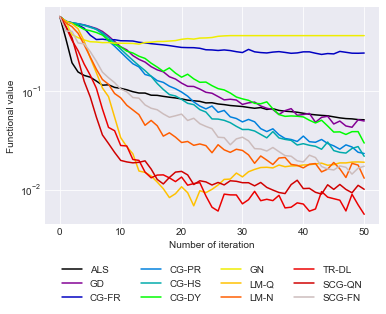

In [8]:
result_dirname = '../results/experiment1/'
result_filename = 'TLD_projected.npz'

use_method_names = []
if len(use_method_names) > 0:
    use_methods = select_methods(methods, use_method_names)
else:
    use_methods = copy.deepcopy(methods)

df = np.load(result_dirname+result_filename)

current_cmap = plt.get_cmap('nipy_spectral')
cmap_alpha = 0.
cmap_beta = 0.35
cmap_gamma = 0.7
cmap_delta = 0.995
w = 0.3
cmap_interval = np.linspace(cmap_alpha, cmap_beta, len(use_methods)/2-1).tolist()
cmap_interval += [w*cmap_beta + (1.-w)*cmap_gamma]
cmap_interval += np.linspace(cmap_gamma, cmap_delta, len(use_methods)-len(use_methods)/2).tolist()
palette = [current_cmap(x) for x in cmap_interval]
sns.set_style("darkgrid")
fig = plt.figure(figsize=(6, 4))
f = df['resultFV']
I, J = f.shape[2:4]
for k in xrange(len(use_methods)):
    plt.semilogy(np.median(f[:, k, -1, -1, :], axis=0), label=use_methods[k][0], color=palette[k])
    

plt.xlabel('Number of iteration')
plt.ylabel('Functional value')

legend = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.show()

### 3.2 Full (Lr, 1) <a class="anchor" id="3-2-lro"></a>

- [3.2.1 Computations](#3-2-1-computations)
- [3.2.2 Underestimated and precise ranks](#3-2-2-all-ranks)
- [3.2.3 Precise rank plot](#3-2-3-as-published)

[Up to section](#3-projected) $\quad$
[Back to contents](#Contents)

### 3.2.1 Computations <a class="anchor" id="3-2-1-computations"></a>

[Up to subsection](#3-2-lro) $\quad$
[Up to section](#3-projected) $\quad$
[Back to contents](#Contents)

In [ ]:
np.random.seed(random_state)
constrained_modes = [0]

result_dirname = '../results/experiment1/'
result_filename = 'LRO_projected.npz'

use_method_names = []
if len(use_method_names) > 0:
    use_methods = select_methods(methods, use_method_names)
else:
    use_methods = copy.deepcopy(methods)

#################### Tensor configuration ################
# Number of subjects
Nsubj = 5
# dimensionality
d = 3
# shape
n = [20]*(d-1)+[Nsubj]
################## (Lr, 1) terms parameters
Rl = Nsubj
L = [3]*Rl
P = d-1
##########################################################
    
canonical_dict = None
tucker_dict = None
lro_dict = {
    'L': L + [len(L)],
    'P': P
}
constraints = group.group_constraint(n, constrained_modes, otype='projected')

random_experiment.launcher(
    N_jobs, result_dirname, n, use_methods, canonical_dict, lro_dict, tucker_dict,
    result_filename, Nrun, maxitnum, constraints, projector
)
print "Full (Lr,1): convergence with proj group constraint"


### 3.2.2 Underestimated and precise ranks <a class="anchor" id="3-2-2-all-ranks"></a>

[Up to subsection](#3-2-lro) $\quad$
[Up to section](#3-projected) $\quad$
[Back to contents](#Contents)

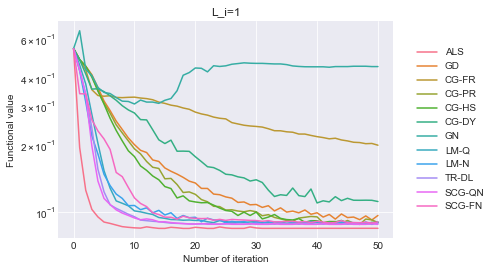

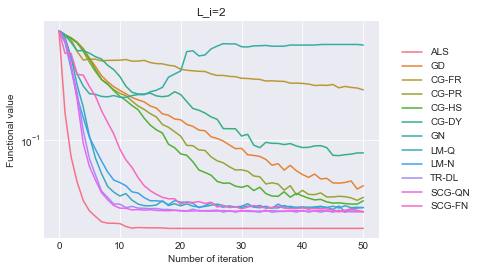

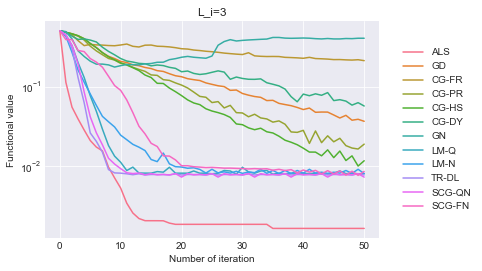

In [9]:
result_dirname = '../results/experiment1/'
result_filename = 'LRO_projected.npz'

df = np.load(result_dirname+result_filename)
palette = sns.color_palette("husl", len(use_methods))
f = df['resultFV']
I = f.shape[2]
for i in xrange(I):
    for k in xrange(len(use_methods)):
        plt.semilogy(np.median(f[:, k, i, :], axis=0), label=use_methods[k][0], color=palette[k])
    plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
    plt.title('L_i=%d' % (i+1))
    plt.xlabel('Number of iteration')
    plt.ylabel('Functional value')
    plt.show()

### 3.2.3 Precise rank plot <a class="anchor" id="3-2-3-as-published"></a>

[Up to subsection](#3-2-lro) $\quad$
[Up to section](#3-projected) $\quad$
[Back to contents](#Contents)

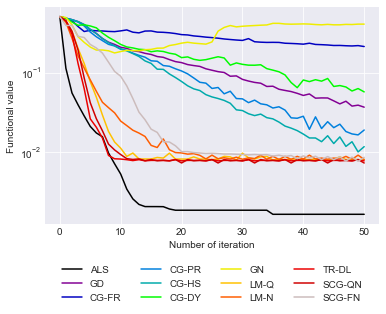

In [10]:
result_dirname = '../results/experiment1/'
result_filename = 'LRO_projected.npz'

use_method_names = []
if len(use_method_names) > 0:
    use_methods = select_methods(methods, use_method_names)
else:
    use_methods = copy.deepcopy(methods)

df = np.load(result_dirname+result_filename)

current_cmap = plt.get_cmap('nipy_spectral')
cmap_alpha = 0.
cmap_beta = 0.35
cmap_gamma = 0.7
cmap_delta = 0.995
w = 0.3
cmap_interval = np.linspace(cmap_alpha, cmap_beta, len(use_methods)/2-1).tolist()
cmap_interval += [w*cmap_beta + (1.-w)*cmap_gamma]
cmap_interval += np.linspace(cmap_gamma, cmap_delta, len(use_methods)-len(use_methods)/2).tolist()
palette = [current_cmap(x) for x in cmap_interval]
sns.set_style("darkgrid")
fig = plt.figure(figsize=(6, 4))
f = df['resultFV']
I, J = f.shape[2:4]
for k in xrange(len(use_methods)):
    plt.semilogy(np.median(f[:, k, -1, :], axis=0), label=use_methods[k][0], color=palette[k])
    
plt.xlabel('Number of iteration')
plt.ylabel('Functional value')

legend = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.show()

## 4. Convergence with group constraints (Lagrange multipliers) <a class="anchor" id="4-lm"></a>

- [4.1 Tucker+(Lr, 1)](#4-1-tld)
    - [4.1.1 Computations](#4-1-1-computations)
    - [4.1.2 Underestimated and precise ranks](#4-1-2-all-ranks)
    - [4.1.3 Precise rank plot](#4-1-3-as-published)
- [4.2 Full (lr, 1)](#4-2-lro)
    - [4.2.1 Computations](#4-2-1-computations)
    - [4.2.2 Underestimated and precise ranks](#4-2-2-all-ranks)
    - [4.2.3 Precise rank plot](#4-2-3-as-published)
    
[Back to contents](#Contents)

## 4.1 Tucker+(Lr, 1) <a class="anchor" id="4-1-tld"></a>

- [4.1.1 Computations](#4-1-1-computations)
- [4.1.2 Underestimated and precise ranks](#4-1-2-all-ranks)
- [4.1.3 Precise rank plot](#4-1-3-as-published)

[Up to section](#4-lm) $\quad$
[Back to contents](#Contents)

### 4.1.1 Computations <a class="anchor" id="4-1-1-computations"></a>

[Up to subsection](#4-1-tld) $\quad$
[Up to section](#4-lm) $\quad$
[Back to contents](#Contents)

In [ ]:
np.random.seed(random_state)
constrained_modes = [0]

result_dirname = '../results/experiment1/'
result_filename = 'TLD_lm.npz'

use_method_names = ["GN", "LM-Q", "LM-N", "TR-DL", "SCG-QN", "SCG-FN"]
if len(use_method_names) > 0:
    use_methods = select_methods(methods, use_method_names)
else:
    use_methods = copy.deepcopy(methods)

#################### Tensor configuration ################
# Number of subjects
Nsubj = 5
# Single Tucker term for group part
NTcores = 1
# dimensionality
d = 3
# shape
n = [20]*(d-1)+[Nsubj]
################## Tucker term parameters
# rank
r = 3*np.ones([NTcores, d], dtype=np.int)
r[:, -1] = Nsubj
################## (Lr, 1) terms parameters
Rl = Nsubj
L = [3]*Rl
P = d-1
##########################################################
canonical_dict = None
lro_dict = {
    'L': L,
    'P': P
}
tucker_dict = {
    'r': r
}
    
constraints = group.group_constraint(n, constrained_modes, otype='Lagrange')
random_experiment.launcher(
    N_jobs, result_dirname, n, use_methods, canonical_dict, lro_dict, tucker_dict,
    result_filename, Nrun, maxitnum, constraints, projector
)
print "Tucker+(Lr,1): convergence with Lag.mult. group constraint"

### 4.1.2 Underestimated and precise ranks <a class="anchor" id="4-1-2-all-ranks"></a>

[Up to subsection](#4-1-tld) $\quad$
[Up to section](#4-lm) $\quad$
[Back to contents](#Contents)

/home/pavel/apd/lib/python2.7/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median for 27 results
  r = func(a, **kwargs)
/home/pavel/apd/lib/python2.7/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


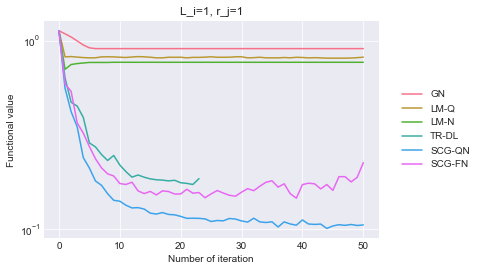

/home/pavel/apd/lib/python2.7/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median for 26 results
  r = func(a, **kwargs)


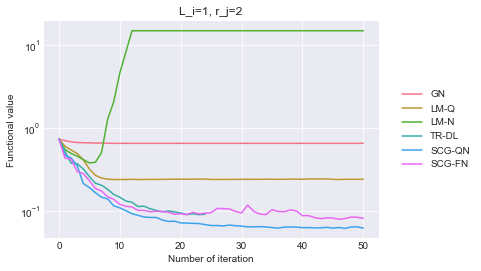

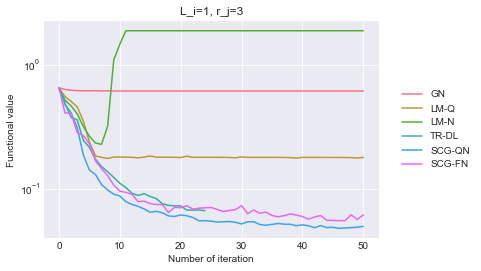

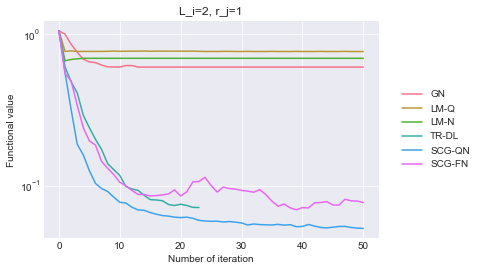

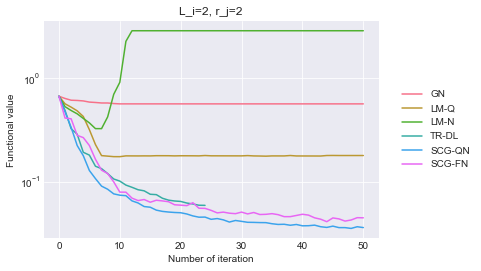

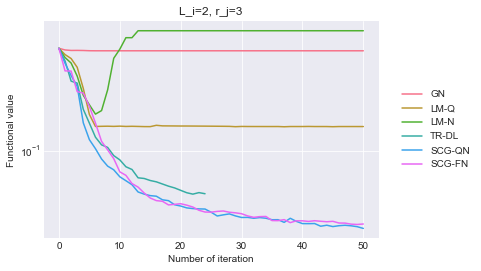

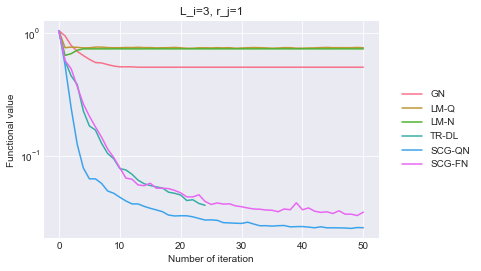

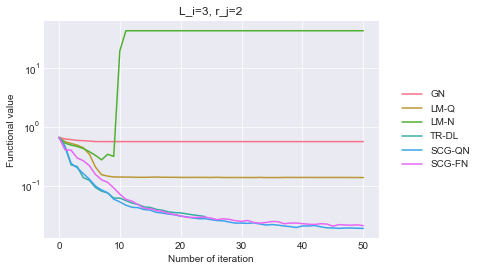

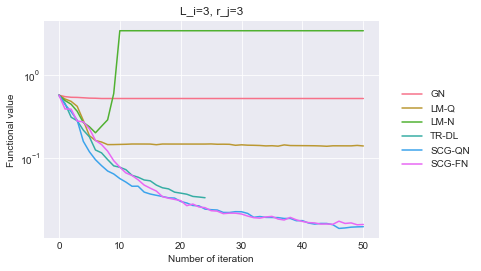

In [11]:
result_dirname = '../results/experiment1/'
result_filename = 'TLD_lm.npz'

use_method_names = ["GN", "LM-Q", "LM-N", "TR-DL", "SCG-QN", "SCG-FN"]
if len(use_method_names) > 0:
    use_methods = select_methods(methods, use_method_names)
else:
    use_methods = copy.deepcopy(methods)

df = np.load(result_dirname+result_filename)
palette = sns.color_palette("husl", len(use_methods))
f = df['resultFV']
I, J = f.shape[2:4]
for i in xrange(I):
    for j in xrange(J):
        for k in xrange(len(use_methods)):
            plt.semilogy(np.median(f[:, k, i, j, :], axis=0), label=use_methods[k][0], color=palette[k])
        plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
        plt.title('L_i=%d, r_j=%d' % (i+1, j+1))
        plt.xlabel('Number of iteration')
        plt.ylabel('Functional value')
        plt.show()

### 4.1.3 Precise rank plot <a class="anchor" id="4-1-3-as-published"></a>

[Up to subsection](#4-1-tld) $\quad$
[Up to section](#4-lm) $\quad$
[Back to contents](#Contents)

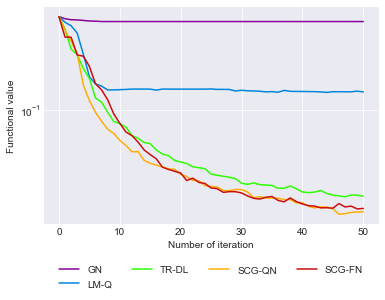

In [12]:
result_dirname = '../results/experiment1/'
result_filename = 'TLD_lm.npz'

use_method_names = ["GN", "LM-Q", "LM-N", "TR-DL", "SCG-QN", "SCG-FN"]

engLang = True
incLeg = False

if len(use_method_names) > 0:
    lenmet = len(methods)
    use_methods = select_methods(methods, use_method_names)
else:
    use_methods = copy.deepcopy(methods)
    lenmet = len(use_methods)

df = np.load(result_dirname+result_filename)

current_cmap = plt.get_cmap('nipy_spectral')

cmap_interval = np.linspace(0.1, 0.95, len(use_methods))
palette = [current_cmap(x) for x in cmap_interval]
sns.set_style("darkgrid")
fig = plt.figure(figsize=(6, 4))

f = df['resultFV']
color_offset = 0
I, J = f.shape[2:4]
for k in xrange(len(use_methods)):
    if use_methods[k][0] == 'LM-N':
        continue
    if use_methods[k][0] == 'TR-DL':
        f[:, k, -1, -1, :] = np.nan_to_num(f[:, k, -1, -1, :])
    plt.semilogy(np.median(f[:, k, -1, -1, :], axis=0), label=use_methods[k][0], color=palette[k+color_offset])


plt.xlabel('Number of iteration')
plt.ylabel('Functional value')


legend = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.show()

### 4.2 Full (Lr, 1) <a class="anchor" id="4-2-lro"></a>

- [3.2.1 Computations](#4-2-1-computations)
- [3.2.2 Underestimated and precise ranks](#4-2-2-all-ranks)
- [3.2.3 Precise rank plot](#4-2-3-as-published)

[Up to section](#4-lm) $\quad$
[Back to contents](#Contents)

### 4.2.1 Computations <a class="anchor" id="4-2-1-computations"></a>

[Up to subsection](#4-2-lro) $\quad$
[Up to section](#4-lm) $\quad$
[Back to contents](#Contents)

In [ ]:
np.random.seed(random_state)
constrained_modes = [0]

result_dirname = '../results/experiment1/'
result_filename = 'LRO_lm.npz'

use_method_names = ["GN", "LM-Q", "LM-N", "TR-DL", "SCG-QN", "SCG-FN"]
if len(use_method_names) > 0:
    use_methods = select_methods(methods, use_method_names)
else:
    use_methods = copy.deepcopy(methods)

#################### Tensor configuration ################
# Number of subjects
Nsubj = 5
# dimensionality
d = 3
# shape
n = [20]*(d-1)+[Nsubj]
################## (Lr, 1) terms parameters
Rl = Nsubj
L = [3]*Rl
P = d-1
##########################################################

canonical_dict = None
tucker_dict = None
lro_dict = {
    'L': L + [len(L)],
    'P': P
}

constraints = group.group_constraint(n, constrained_modes, otype='Lagrange')

random_experiment.launcher(
    N_jobs, result_dirname, n, use_methods, canonical_dict, lro_dict, tucker_dict,
    result_filename, Nrun, maxitnum, constraints, projector
)
print "Full (Lr,1): convergence with Lag.mult. group constraint"

### 4.2.2 Underestimated and precise ranks <a class="anchor" id="4-2-2-all-ranks"></a>

[Up to subsection](#4-2-lro) $\quad$
[Up to section](#4-lm) $\quad$
[Back to contents](#Contents)

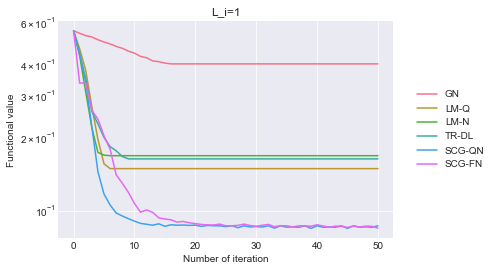

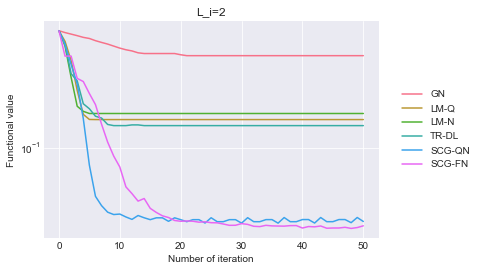

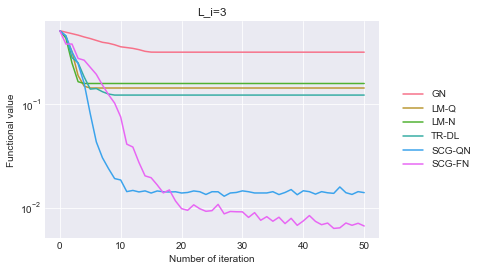

In [13]:
result_dirname = '../results/experiment1/'
result_filename = 'LRO_lm.npz'

df = np.load(result_dirname+result_filename)
palette = sns.color_palette("husl", len(use_methods))
f = df['resultFV']
I = f.shape[2]
for i in xrange(I):
    for k in xrange(len(use_methods)):
        plt.semilogy(np.median(f[:, k, i, :], axis=0), label=use_methods[k][0], color=palette[k])
    plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
    plt.title('L_i=%d' % (i+1))
    plt.xlabel('Number of iteration')
    plt.ylabel('Functional value')
    plt.show()

### 4.2.3 Precise rank plot <a class="anchor" id="4-2-3-as-published"></a>

[Up to subsection](#4-2-lro) $\quad$
[Up to section](#4-lm) $\quad$
[Back to contents](#Contents)

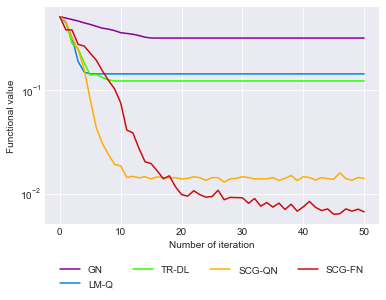

In [14]:
result_dirname = '../results/experiment1/'
result_filename = 'LRO_lm.npz'

use_method_names = ["GN", "LM-Q", "LM-N", "TR-DL", "SCG-QN", "SCG-FN"]

if len(use_method_names) > 0:
    lenmet = len(methods)
    use_methods = select_methods(methods, use_method_names)
else:
    use_methods = copy.deepcopy(methods)
    lenmet = len(use_methods)

df = np.load(result_dirname+result_filename)

current_cmap = plt.get_cmap('nipy_spectral')

cmap_interval = np.linspace(0.1, 0.95, len(use_methods))
palette = [current_cmap(x) for x in cmap_interval]
sns.set_style("darkgrid")
fig = plt.figure(figsize=(6, 4))

f = df['resultFV']
color_offset = 0
I, J = f.shape[2:4]
for k in xrange(len(use_methods)):
    if use_methods[k][0] == 'LM-N':
        continue
    if use_methods[k][0] == 'TR-DL':
        pass#f[:, k, -1, -1, :] = np.nan_to_num(f[:, k, -1, -1, :])
    plt.semilogy(np.median(f[:, k, -1, :], axis=0), label=use_methods[k][0], color=palette[k+color_offset])

plt.xlabel('Number of iteration')
plt.ylabel('Functional value')


legend = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.show()